In [1]:
import mysql.connector
import pandas as pd
from tqdm import tqdm
import os
pd.set_option('display.max_columns', None)


mydb = mysql.connector.connect(
  host="reps-ods-cluster-1.cluster-ro-curqk9xgnt28.us-east-2.rds.amazonaws.com",
  port='3306',
  database ='lobsang',
  user="jaybhatt",
  password="72QmYetSNfGM"
)

In [2]:
## Getting Distinct vanue names from lobsang
get_sales_query = '''SELECT Date_add(l.datetime, interval -8 hour) "selling_date",
       e.id "event_id",
       l.org_id,
       l.parent_id "listing_id",
       t.foreign_id "ticket_id",
       Date_add(e.datetime, interval -8 hour) as "event_datetime",
       Date_add(e.onsale, interval -8 hour) as "onsale_datetime",
	   sg.name "event_type",
	   g.name "genre",
	   l.type "trans_type",
	   v.name "venue",
	   v.city "city",
	   v.state "state",
	   e.name "event_name",
	   p.name "performer",
       t.section AS "section",
       t.row AS "row",
       t.seat AS "seat",
       	   	l.amount /
	(
	select Count(*)
	from lobsang.ticket t
	where t.invoice_line_id = l.id
	) "sell_amt"
       , SB.active_inventory_tags
       , l.cancelled
FROM lobsang.line l
INNER JOIN lobsang.event_link el ON el.foreign_id = l.foreign_event_id AND el.type = 2
INNER JOIN lobsang.event e ON e.id = el.lobsang_id
INNER JOIN lobsang.ticket t ON t.invoice_line_id = l.id
INNER JOIN lobsang.skybox_datamart SB ON SB.event_id = e.id
INNER JOIN lobsang.performer p ON p.id = e.performer_id
INNER JOIN lobsang.genre g ON g.id = p.genre_id
INNER JOIN lobsang.subgenre sg ON sg.id = g.genre_id
INNER JOIN lobsang.venue v ON v.id = e.venue
WHERE l.type = 'invoice' and e.id = 3816604
GROUP BY
        Date_add(l.datetime, interval -8 hour),
       e.id,
       l.org_id,
         l.parent_id,
       t.foreign_id,
       Date_add(e.datetime, interval -8 hour),
       Date_add(e.onsale, interval -8 hour),
       sg.name,
       g.name,
       l.type,
       v.name,
       v.city,
       v.state,
       e.name,
       p.name,
       t.section,
       t.row,
       t.seat,
       l.amount,
       SB.active_inventory_tags,
       l.cancelled'''

sold_df = pd.read_sql(get_sales_query, con=mydb)
sold_df.head(5)

,selling_date,event_id,org_id,listing_id,ticket_id,event_datetime,onsale_datetime,event_type,genre,trans_type,venue,city,state,event_name,performer,section,row,seat,sell_amt,active_inventory_tags,cancelled
0,2022-03-15 16:52:23,3816604,1,2389190,796276675,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1031,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0
1,2022-03-15 16:52:23,3816604,1,2389190,796276676,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1032,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0
2,2022-03-15 16:52:23,3816604,1,2389190,796276677,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1033,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0
3,2022-03-16 17:35:43,3816604,1,2392200,796276674,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1030,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0
4,2022-03-19 21:46:58,3816604,1,2402105,796276673,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1029,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0


In [3]:
## Getting Distinct vanue names from lobsang
get_purchage_query = '''SELECT Date_add(l.datetime, interval -8 hour) "purchase_date",
       e.id "event_id",
       l.org_id,
       l.parent_id "listing_id",
       t.foreign_id "ticket_id",
       Date_add(e.datetime, interval -8 hour) as "event_datetime",
       Date_add(e.onsale, interval -8 hour) as "onsale_datetime",
	   sg.name "event_type",
	   g.name "genre",
	   l.type "trans_type",
	   v.name "venue",
	   v.city "city",
	   v.state "state",
	   e.name "event_name",
	   p.name "performer",
       t.section AS "section",
       t.row AS "row",
       t.seat AS "seat",
       	   	l.amount /
	(
	select Count(*)
	from lobsang.ticket t
	where t.invoice_line_id = l.id
	) "purchase_amt"
       , SB.active_inventory_tags
       , l.cancelled
FROM lobsang.line l
INNER JOIN lobsang.event_link el ON el.foreign_id = l.foreign_event_id AND el.type = 2
INNER JOIN lobsang.event e ON e.id = el.lobsang_id
INNER JOIN lobsang.ticket t ON t.invoice_line_id = l.id
INNER JOIN lobsang.skybox_datamart SB ON SB.event_id = e.id
INNER JOIN lobsang.performer p ON p.id = e.performer_id
INNER JOIN lobsang.genre g ON g.id = p.genre_id
INNER JOIN lobsang.subgenre sg ON sg.id = g.genre_id
INNER JOIN lobsang.venue v ON v.id = e.venue
WHERE l.type = 'invoice' and e.id = 3816604
GROUP BY
        Date_add(l.datetime, interval -8 hour),
       e.id,
       l.org_id,
         l.parent_id,
       t.foreign_id,
       Date_add(e.datetime, interval -8 hour),
       Date_add(e.onsale, interval -8 hour),
       sg.name,
       g.name,
       l.type,
       v.name,
       v.city,
       v.state,
       e.name,
       p.name,
       t.section,
       t.row,
       t.seat,
       l.amount,
       SB.active_inventory_tags,
       l.cancelled'''

purchage_df = pd.read_sql(get_purchage_query, con=mydb)
purchage_df.head(5)

,purchase_date,event_id,org_id,listing_id,ticket_id,event_datetime,onsale_datetime,event_type,genre,trans_type,venue,city,state,event_name,performer,section,row,seat,purchase_amt,active_inventory_tags,cancelled
0,2022-03-15 16:52:23,3816604,1,2389190,796276675,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1031,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0
1,2022-03-15 16:52:23,3816604,1,2389190,796276676,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1032,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0
2,2022-03-15 16:52:23,3816604,1,2389190,796276677,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1033,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0
3,2022-03-16 17:35:43,3816604,1,2392200,796276674,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1030,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0
4,2022-03-19 21:46:58,3816604,1,2402105,796276673,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1029,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0


In [4]:
len(purchage_df.seat.unique())

237

In [5]:
len(sold_df['seat'].unique())

237

In [6]:
sold_df['date']= sold_df.selling_date.dt.date

In [7]:
test_df = sold_df.merge(purchage_df[['ticket_id','purchase_amt','seat']],on= 'seat')
test_df.head()

,selling_date,event_id,org_id,listing_id,ticket_id_x,event_datetime,onsale_datetime,event_type,genre,trans_type,venue,city,state,event_name,performer,section,row,seat,sell_amt,active_inventory_tags,cancelled,date,ticket_id_y,purchase_amt
0,2022-03-15 16:52:23,3816604,1,2389190,796276675,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1031,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0,2022-03-15,796276675,92.12
1,2022-03-15 16:52:23,3816604,1,2389190,796276676,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1032,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0,2022-03-15,796276676,92.12
2,2022-03-15 16:52:23,3816604,1,2389190,796276677,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1033,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0,2022-03-15,796276677,92.12
3,2022-03-16 17:35:43,3816604,1,2392200,796276674,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1030,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0,2022-03-16,796276674,92.12
4,2022-03-19 21:46:58,3816604,1,2402105,796276673,2022-06-03 15:00:00,None,Music,Dance/Electronica,invoice,Jacobs Pavilion at Nautica,Cleveland,OH,Flume,Flume,GENERALADMISSIONFLOOR,GA,1029,92.12,"upbeat,oncalljpaulgiray@reps2.com,fferror,onca...",0,2022-03-19,796276673,92.12


In [8]:
event_date = test_df.event_datetime.dt.date[0]
event_date

datetime.date(2022, 6, 3)

In [9]:
test_df[['date','event_id','section','row','seat','sell_amt','purchase_amt']]

,date,event_id,section,row,seat,sell_amt,purchase_amt
0,2022-03-15,3816604,GENERALADMISSIONFLOOR,GA,1031,92.12,92.12
1,2022-03-15,3816604,GENERALADMISSIONFLOOR,GA,1032,92.12,92.12
2,2022-03-15,3816604,GENERALADMISSIONFLOOR,GA,1033,92.12,92.12
3,2022-03-16,3816604,GENERALADMISSIONFLOOR,GA,1030,92.12,92.12
4,2022-03-19,3816604,GENERALADMISSIONFLOOR,GA,1029,92.12,92.12
...,...,...,...,...,...,...,...
262,2022-06-03,3816604,GENERALADMISSIONFLOOR,GA,1075,64.41,64.41
263,2022-06-07,3816604,GA BLEACHERS,GA,1080,0.00,0.00
264,2022-06-07,3816604,GA BLEACHERS,GA,1081,0.00,0.00
265,2022-06-07,3816604,GENERALADMISSIONFLOOR,GA,237,0.00,0.00


In [10]:
f_df = test_df.groupby('date').count()[['event_id']].join(test_df.groupby('date').mean()[['sell_amt','purchase_amt']])
f_df =f_df.iloc[:-1,:]

In [11]:
f_df = f_df.rename(columns ={'event_id':'no tickets sol'})

In [12]:
f_df['Ratio'] = f_df['sell_amt']/f_df['purchase_amt']

In [13]:
f_df['no tickets sol * Ratio']= f_df['no tickets sol']*f_df['Ratio']

In [14]:
f_df['norm_ratio'] = f_df['no tickets sol * Ratio']/f_df['no tickets sol * Ratio'].sum()

In [15]:
f_df['norm_ratio_cum_sum'] = f_df['norm_ratio'].cumsum()

In [16]:
f_df['norm_ratio*1000'] = f_df['norm_ratio']*1000

In [17]:
f_df['no tickets sol_cumsum'] = f_df['no tickets sol'].cumsum()

In [18]:
f_df['actual_cumsum_ratio']=f_df['no tickets sol_cumsum']/f_df['no tickets sol'].sum()

<AxesSubplot:xlabel='date'>

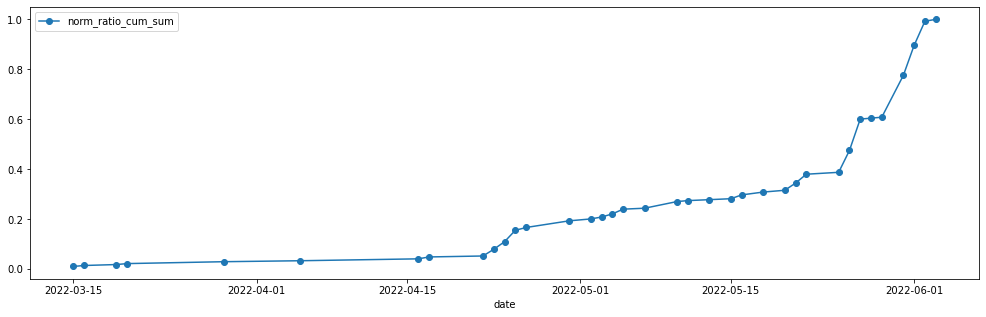

In [19]:
f_df[['norm_ratio_cum_sum']].plot(figsize=(17,5),marker = 'o')

In [20]:
f_df['DTE'] = f_df.index-event_date 

<AxesSubplot:xlabel='DTE'>

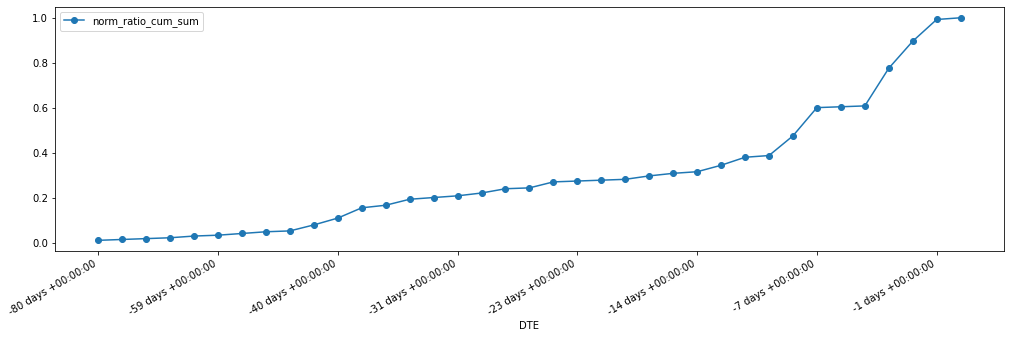

In [21]:
f_df.set_index('DTE')[['norm_ratio_cum_sum']].plot(figsize=(17,5),marker = 'o')

<AxesSubplot:xlabel='DTE'>

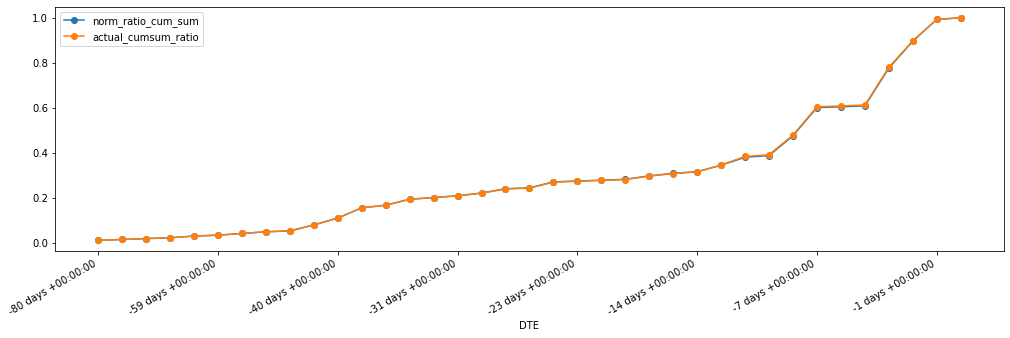

In [22]:
f_df.set_index('DTE')[['norm_ratio_cum_sum','actual_cumsum_ratio']].plot(figsize=(17,5),marker = 'o')

In [23]:
f_df.to_csv("event_data_3816604.csv")